In [1]:
%matplotlib inline

In [2]:
!git pull

Already up to date.


Text(0,0.5,'Temperature')

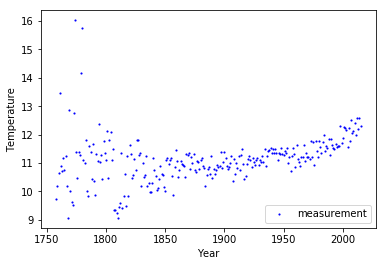

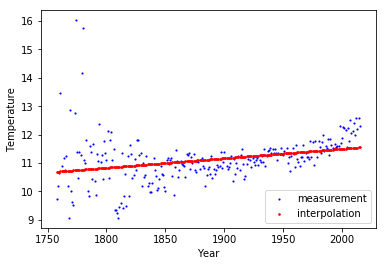

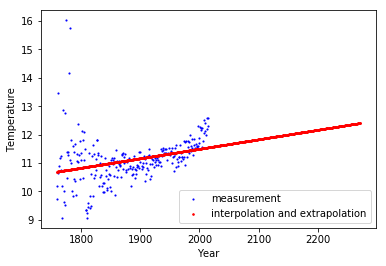

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
d = pd.read_csv('GlobalTemperatures.csv')
offset = 100
date = d['dt'][offset::12]
year = np.array([int(e.split('-')[0]) for e in date])
temperature = d['LandAverageTemperature'][offset::12]
lr = linear_model.LinearRegression()
lr.fit(year.reshape((-1,1)), temperature.values)
year_test = np.linspace(year.min(), year.max(), len(year))
temperature_predict = lr.predict(year_test.reshape((-1,1)))

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_test, temperature_predict, c='red', marker='.', s=10, label='interpolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
year_with_future_test = np.linspace(year.min(), year.max() + (year.max() - year.min()), 500)
temperature_with_future_predict = lr.predict(year_with_future_test.reshape((-1,1)))
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_with_future_test, temperature_with_future_predict, c='red', marker='.', s=10, label='interpolation and extrapolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')


(array([ 7.,  5., 19., 45., 80., 59., 24., 10.,  2.,  1.,  2.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  2.]),
 array([-1.79411145, -1.42167559, -1.04923973, -0.67680387, -0.30436801,
         0.06806785,  0.44050371,  0.81293957,  1.18537543,  1.55781129,
         1.93024715,  2.30268301,  2.67511887,  3.04755473,  3.41999059,
         3.79242645,  4.16486231,  4.53729817,  4.90973403,  5.28216989]),
 <a list of 19 Patch objects>)

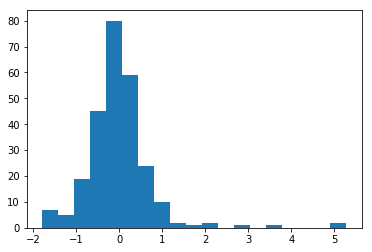

In [4]:
error = np.array(temperature - temperature_predict)
bins = np.linspace(error.min(), error.max(), 20)
plt.hist(error, bins)

In [5]:
error.mean()

4.88842386036503e-16

In [6]:
np.mean(error ** 2)

0.6190908820562999

In [7]:
(error ** 2).mean()

0.6190908820562999

In [8]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lr.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': 1,
 'coef_': array([0.00334115]),
 '_residues': 159.72544757052535,
 'rank_': 1,
 'singular_': array([1196.28779982]),
 'intercept_': 4.8156328594452775}

In [10]:
w = np.zeros((2))
w[0] = lr.coef_[0]
w[1] = lr.intercept_

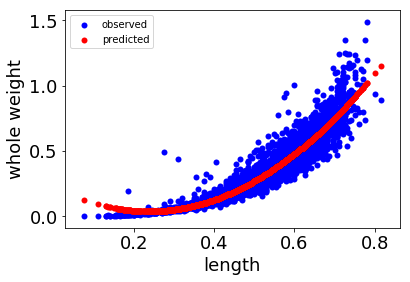

In [11]:
#!/usr/bin/env python
# polynomial regression to abalone data

from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

datalist = []
f = open('abalone.data', 'r')
for line in f:
    line = line.rstrip()
    elems = line.split(',')
    datalist.append(elems[1:])
f.close()
data = np.array(datalist)
x = np.c_[np.float_(data[:,0])]
y = np.c_[np.float_(data[:,4])]

lr = linear_model.LinearRegression()

X = np.hstack((x, x ** 2))

lr.fit(X, y)

predicted = lr.coef_[0,1] * np.power(x,2) + lr.coef_[0,0] * x + lr.intercept_ * np.ones(x.shape)

fig, ax = plt.subplots()
ax.scatter(x, y, c='blue', marker='o', label='observed', lw=0)
ax.scatter(x, predicted, c='red', marker='o', label='predicted', lw=0)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='upper left')
ax.set_xlabel('length', fontsize=18)
ax.set_ylabel('whole weight', fontsize=18)

plt.show()


In [12]:
error = predicted - y

In [13]:
(error ** 2).sum()

23.63525688828701

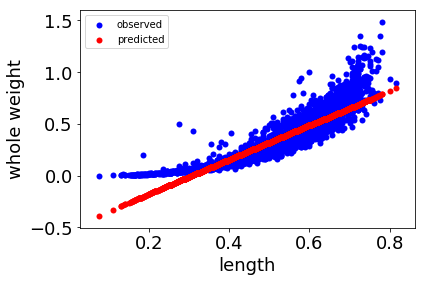

In [14]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

datalist = []
f = open('abalone.data', 'r')
for line in f:
    line = line.rstrip()
    elems = line.split(',')
    datalist.append(elems[1:])
f.close()
data = np.array(datalist)
x = np.c_[np.float_(data[:,0])]
y = np.c_[np.float_(data[:,4])]

lr = linear_model.LinearRegression()

lr.fit(x, y)

predicted = lr.predict(x)

fig, ax = plt.subplots()
ax.scatter(x, y, c='blue', marker='o', label='observed', lw=0)
ax.scatter(x, predicted, c='red', marker='o', label='predicted', lw=0)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='upper left')
ax.set_xlabel('length', fontsize=18)
ax.set_ylabel('whole weight', fontsize=18)

plt.show()
